# EX 1 Serial

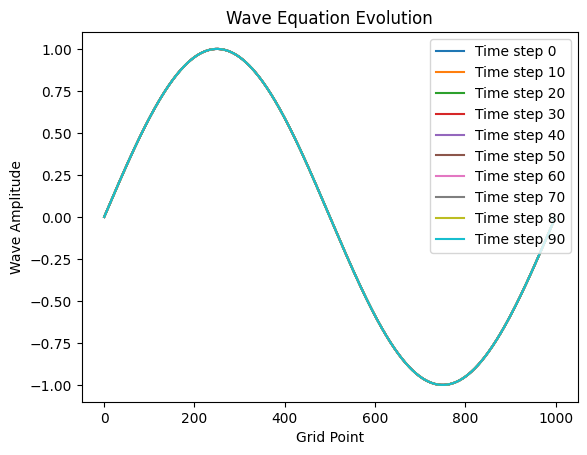

In [11]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory where output files are located
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'ex_1_serial'))

pattern = os.path.join(base_directory, "wave_output_*.txt")
files = glob.glob(pattern)

for file in files:
    data = np.loadtxt(file)
    plt.plot(data, label=f"Time step {file.split('_')[-1].split('.')[0]}")

plt.xlabel("Grid Point")
plt.ylabel("Wave Amplitude")
plt.title("Wave Equation Evolution")
plt.legend()
plt.show()

# EX 1 MPI 

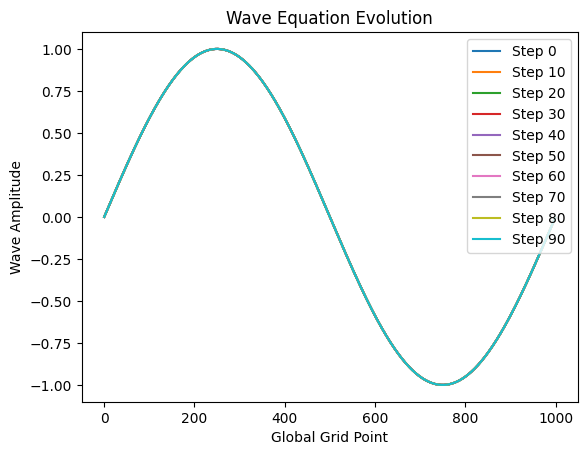

In [10]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory where output files are located
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'ex_1_mpi'))

# Pattern to match files with both step and rank in the filename
pattern = os.path.join(base_directory, "wave_output_step*_rank*.txt")
files = glob.glob(pattern)

# Organize files by time step
data_by_step = {}
for filepath in files:
    fname = os.path.basename(filepath)
    match = re.match(r"wave_output_step(\d+)_rank(\d+)\.txt", fname)
    if match:
        step = int(match.group(1))
        rank = int(match.group(2))
        data_by_step.setdefault(step, []).append((rank, filepath))

# Plot concatenated data for each time step
for step in sorted(data_by_step.keys()):
    # Sort by rank so we concatenate in the correct order
    ranked_files = sorted(data_by_step[step], key=lambda x: x[0])
    # Load and concatenate each rank's output
    arrays = [np.loadtxt(fp) for _, fp in ranked_files]
    full_wave = np.concatenate(arrays)
    plt.plot(full_wave, label=f"Step {step}")

plt.xlabel("Global Grid Point")
plt.ylabel("Wave Amplitude")
plt.title("Wave Equation Evolution")
plt.legend()
plt.show()


# Bonus Assignment Serial

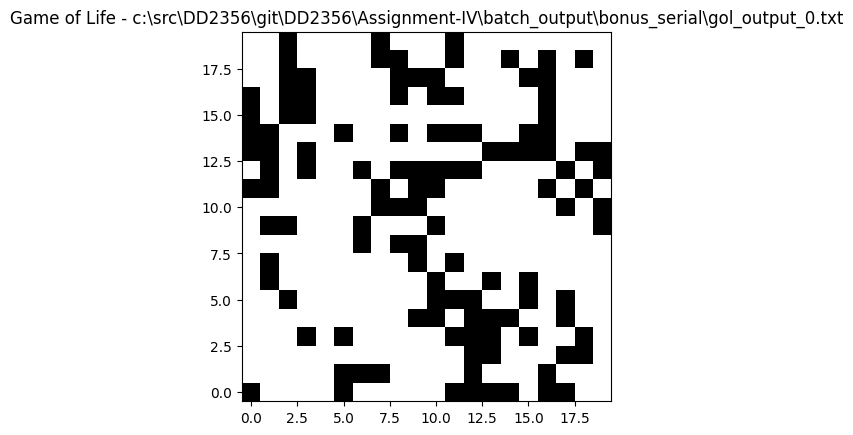

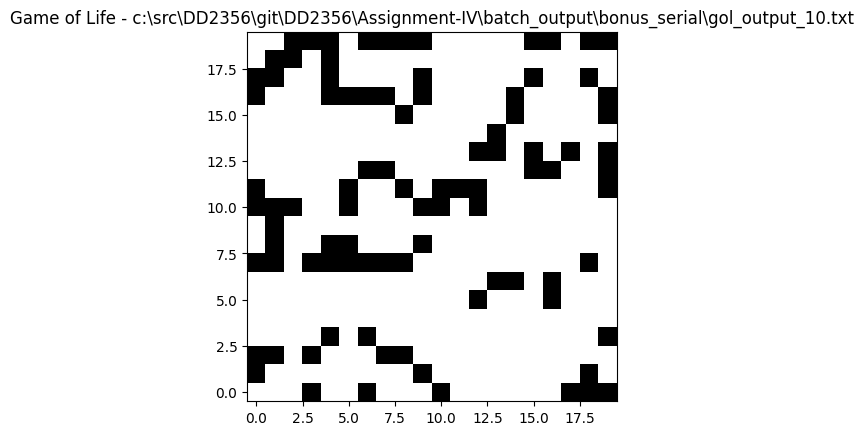

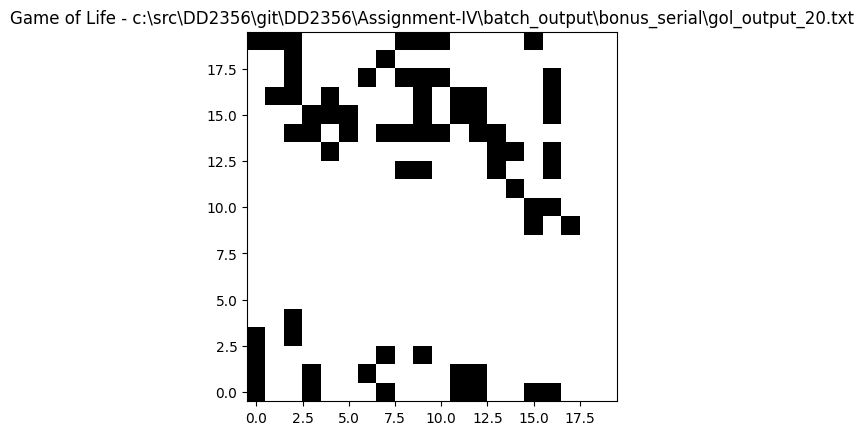

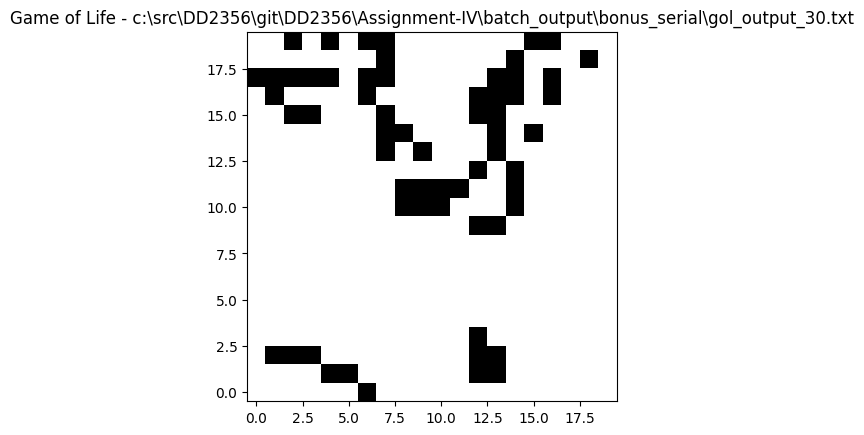

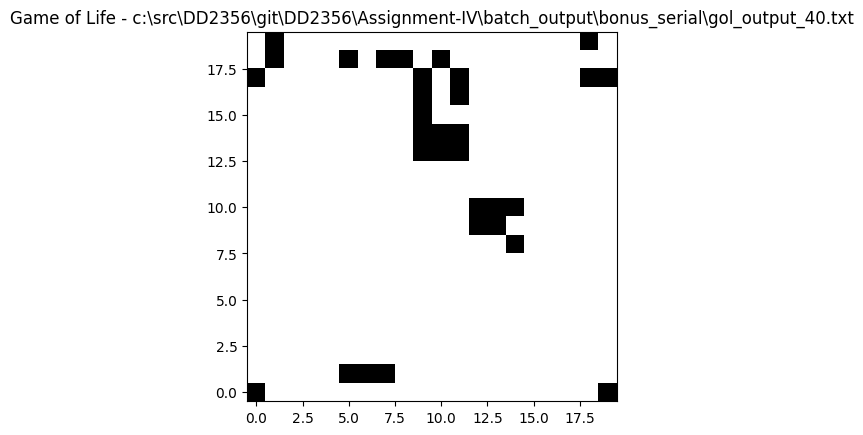

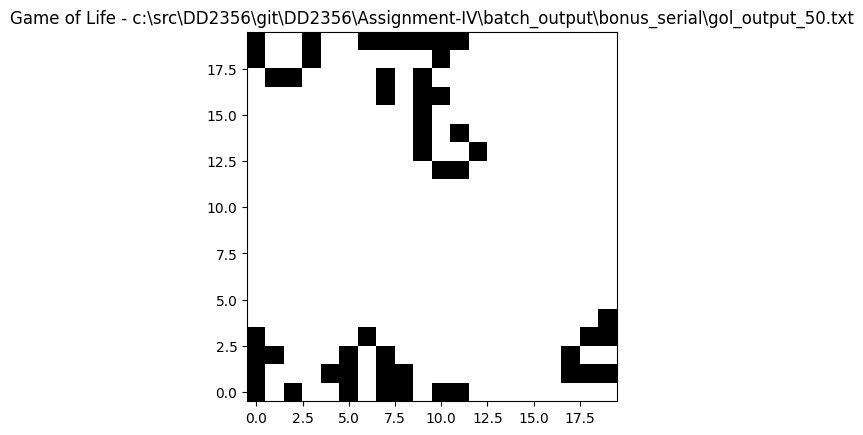

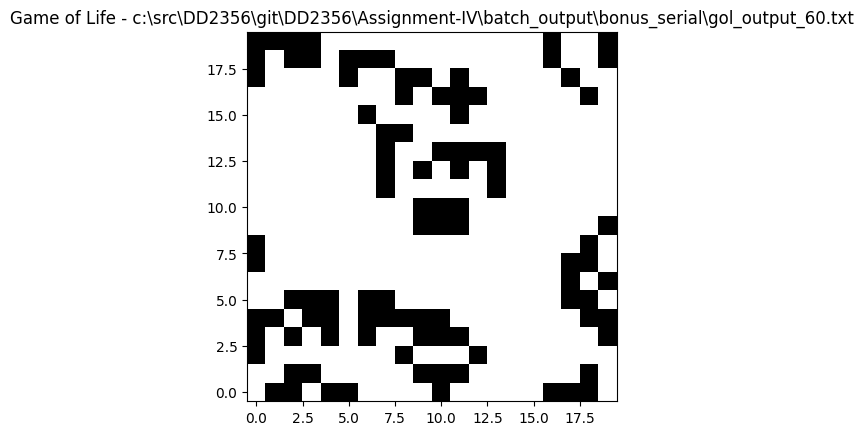

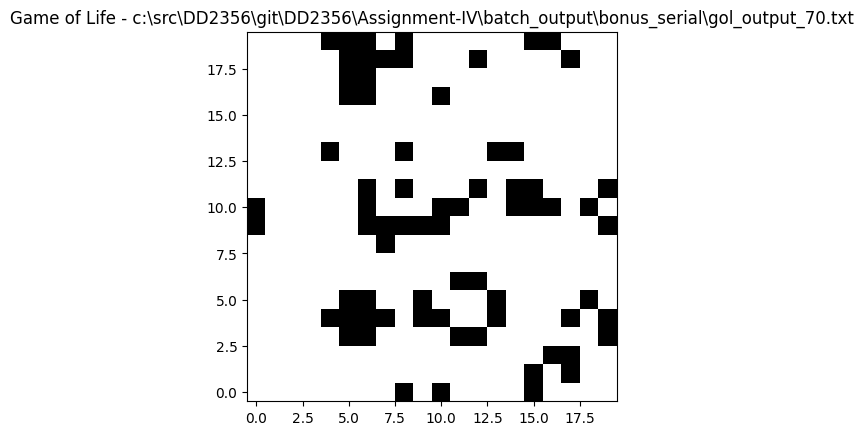

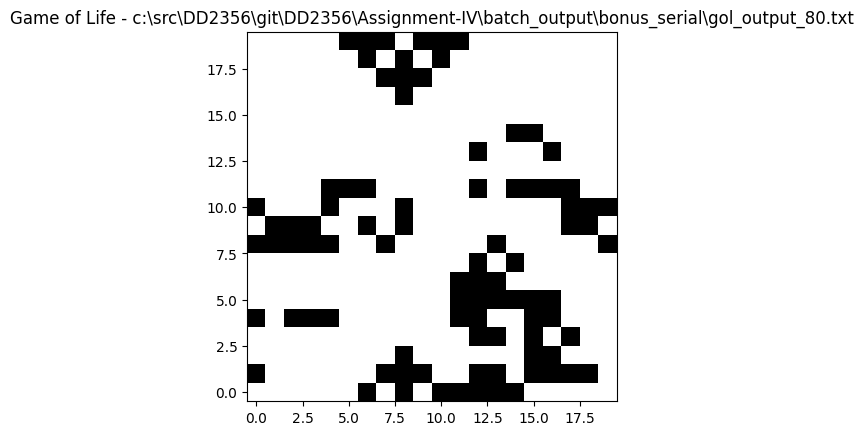

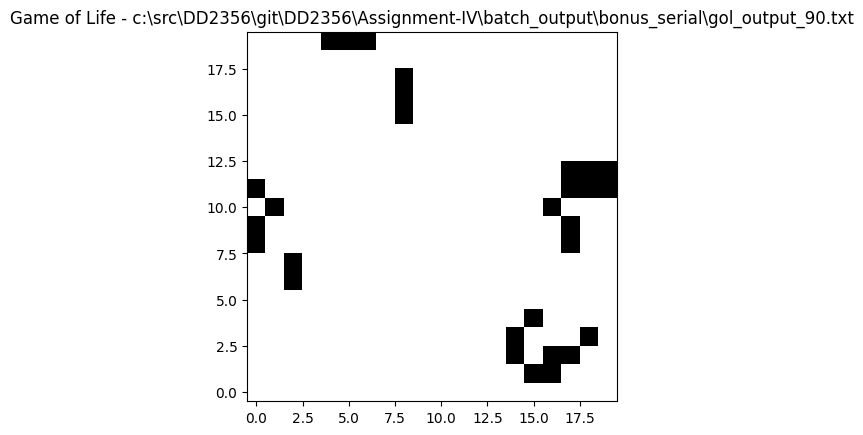

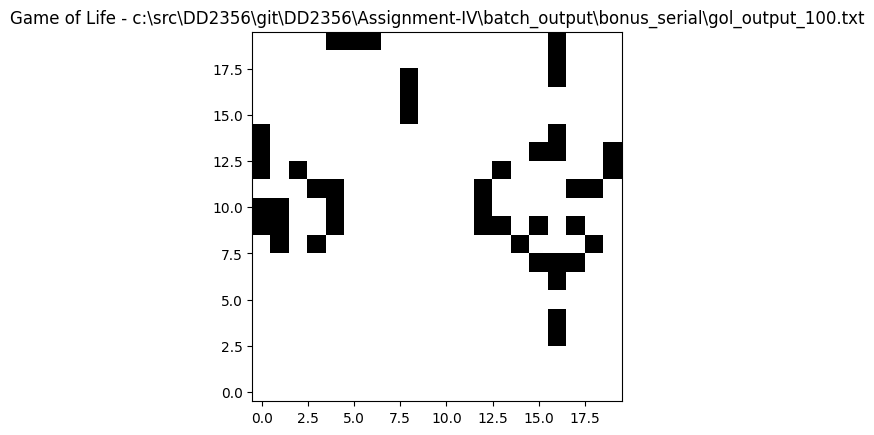

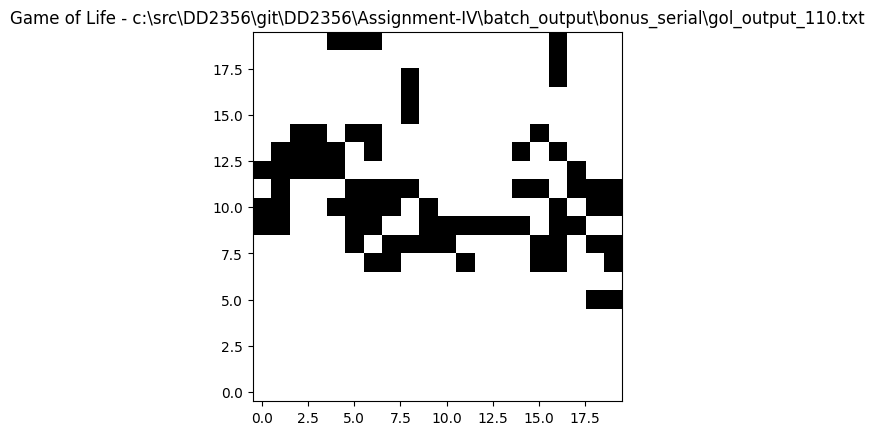

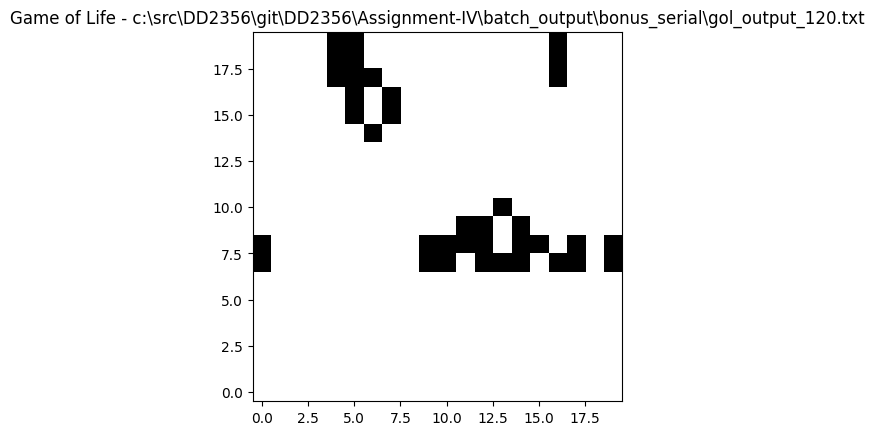

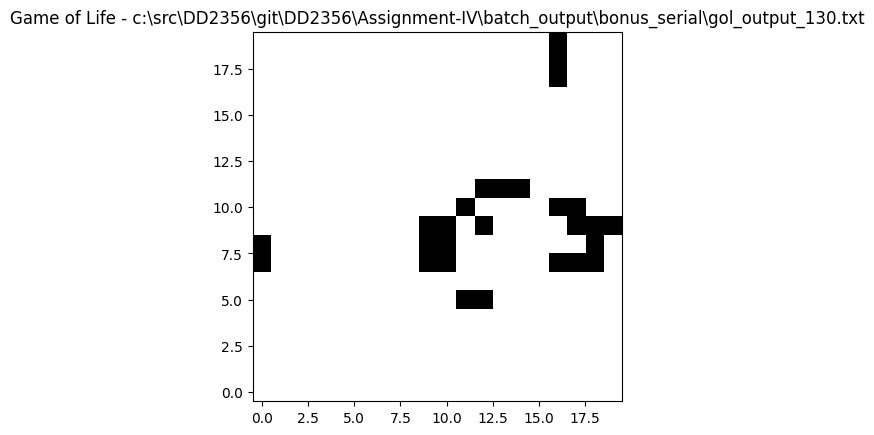

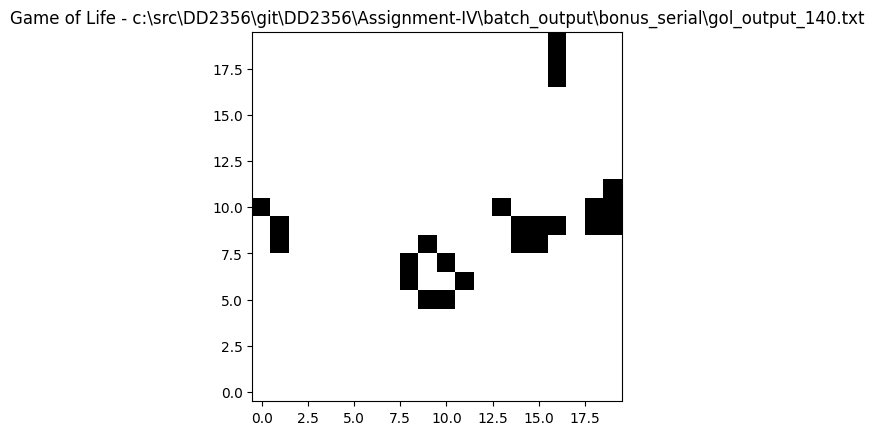

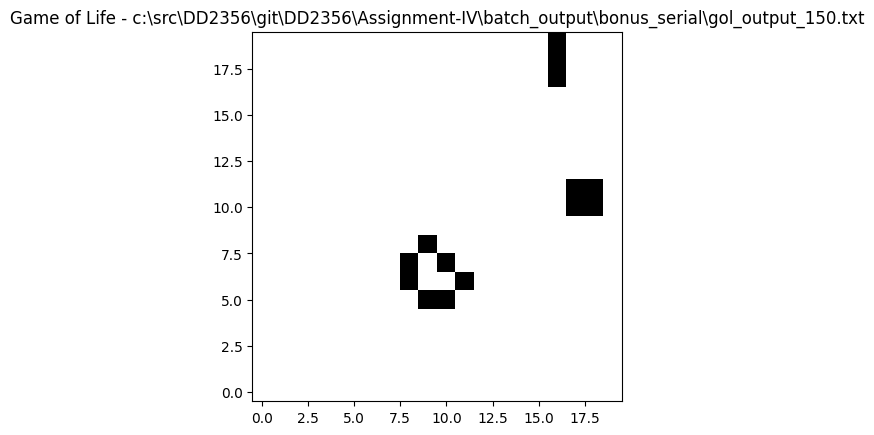

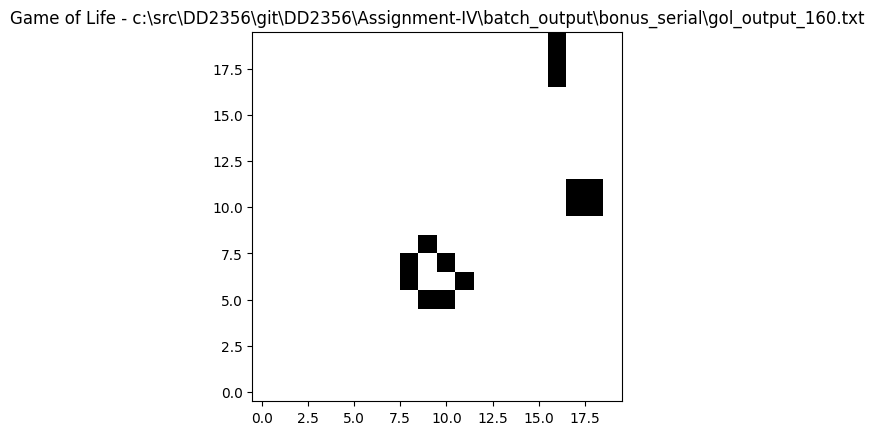

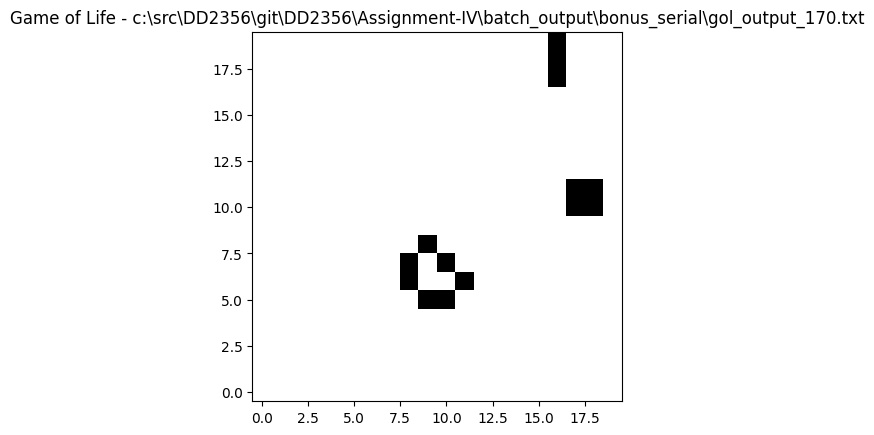

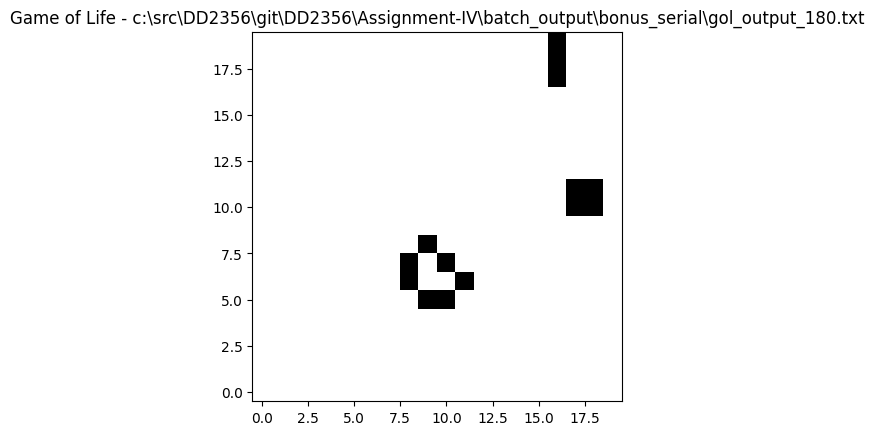

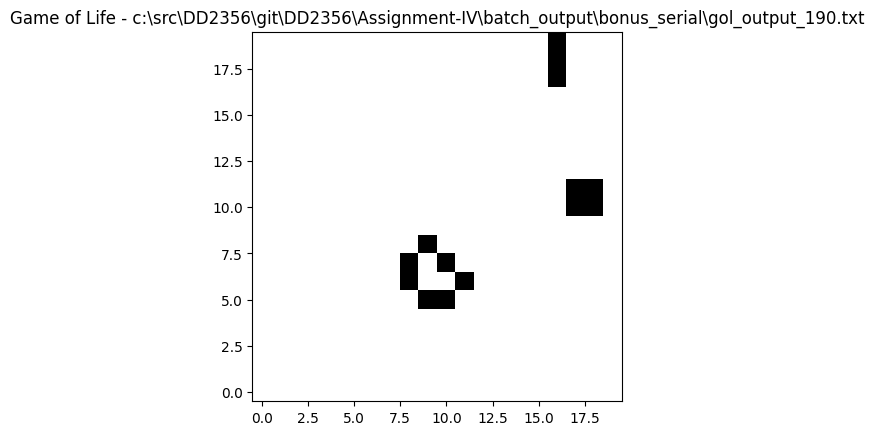

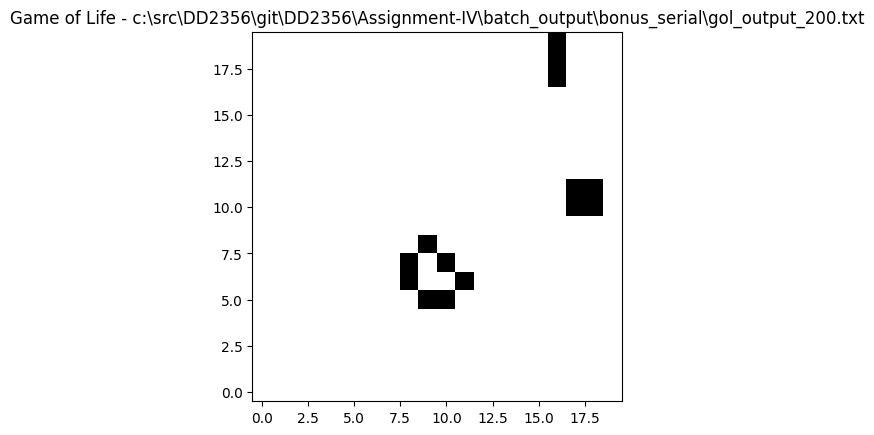

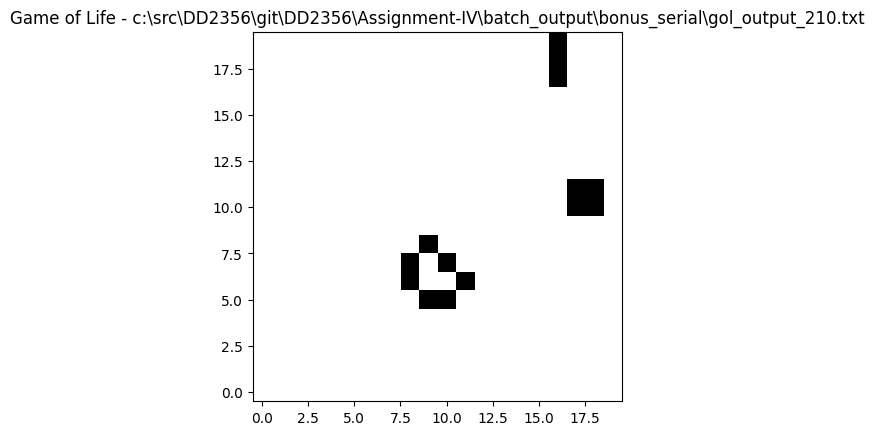

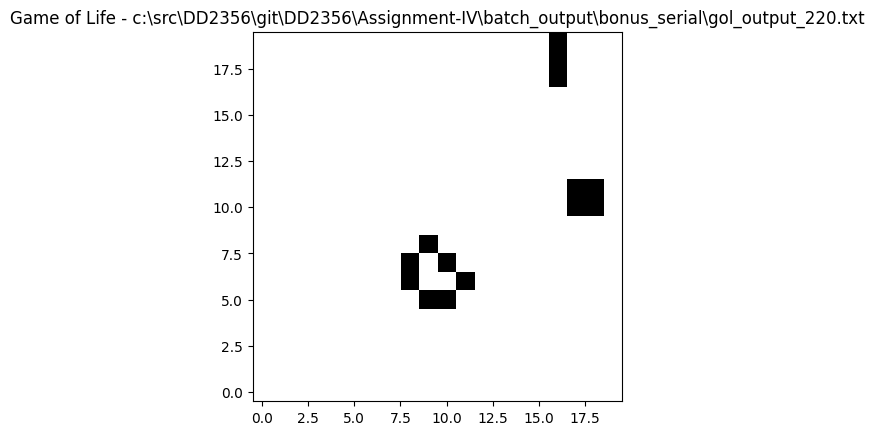

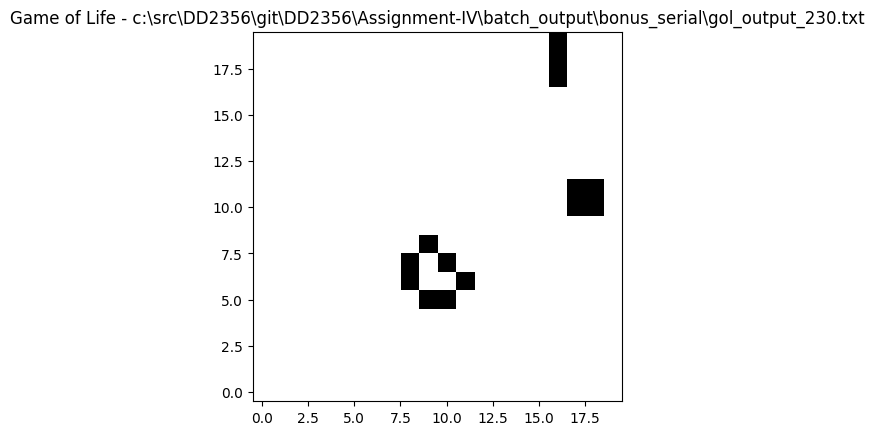

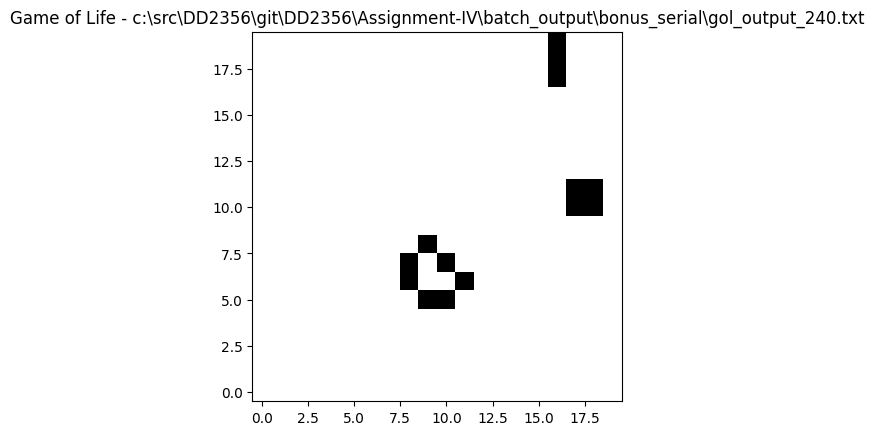

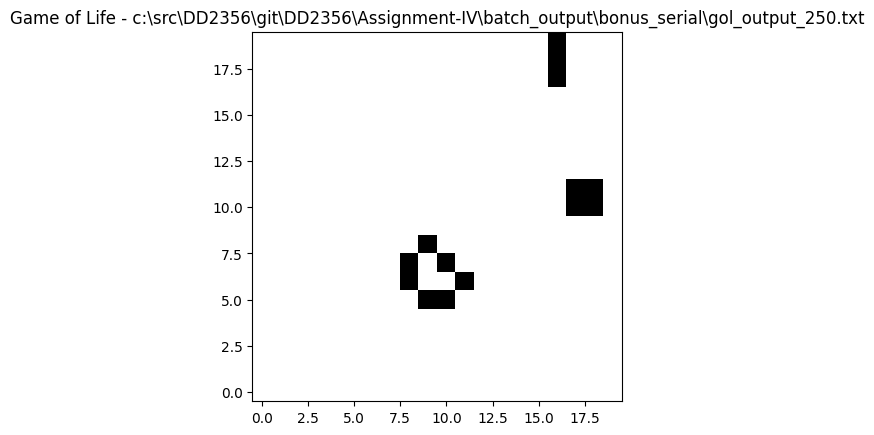

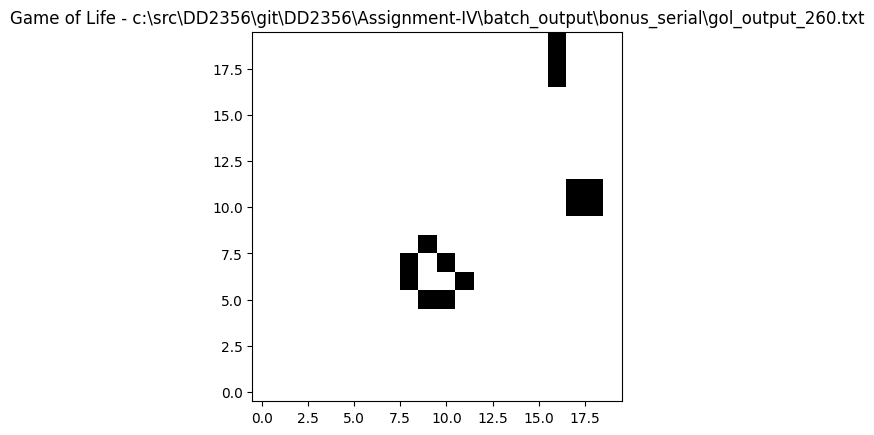

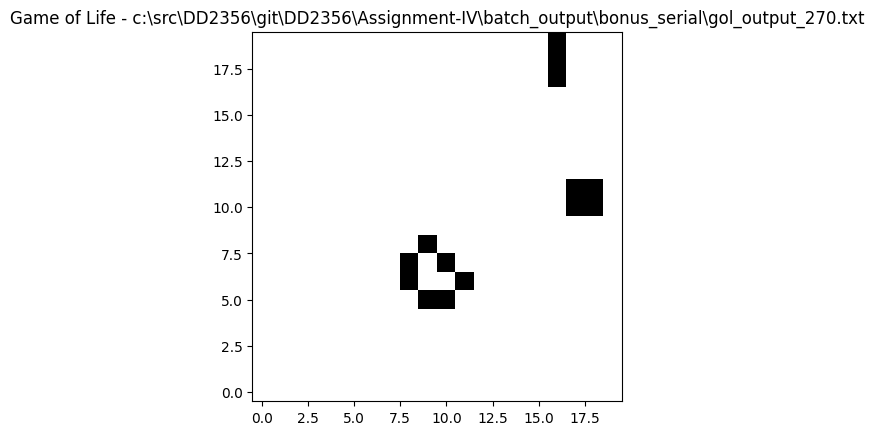

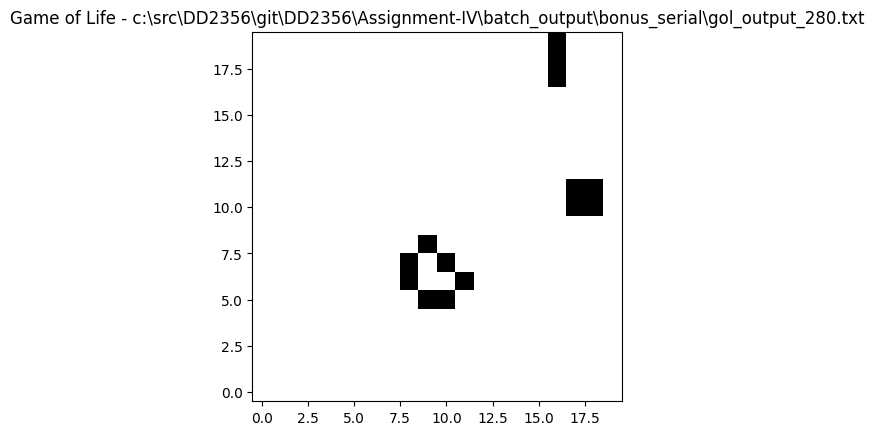

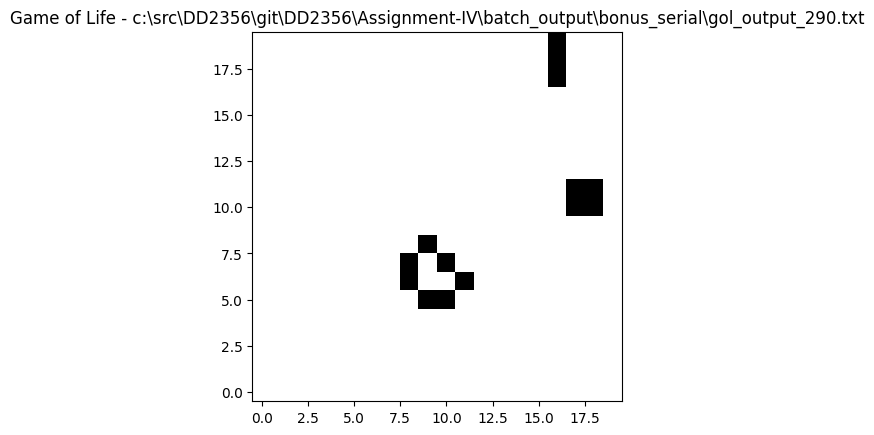

GIF saved at: c:\src\DD2356\git\DD2356\Assignment-IV\batch_output\bonus_serial\game_of_life_serial.gif


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import imageio.v2 as imageio  # imageio.v2 to avoid FutureWarnings

# Set up directories and file matching
current_working_directory = os.getcwd()
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'bonus_serial'))
pattern = os.path.join(base_directory, "gol_output_*.txt")
files = glob.glob(pattern)

# Sort files numerically by step number
files_sorted = sorted(
    files,
    key=lambda path: int(os.path.splitext(os.path.basename(path))[0].split('_')[-1])
)

# Create temporary list of images
images = []
for file in files_sorted:
    data = np.loadtxt(file)
    fig, ax = plt.subplots()
    ax.imshow(data, cmap='binary', origin='lower')
    ax.set_title(f"Step {os.path.basename(file)}")
    ax.axis('off')

    # Save to a temporary image buffer
    temp_path = f"{file}.png"
    plt.savefig(temp_path, bbox_inches='tight')
    plt.close(fig)
    images.append(imageio.imread(temp_path))
    os.remove(temp_path)  # clean up temporary image

# Save the gif
gif_path = os.path.join(base_directory, "game_of_life_serial.gif")
imageio.mimsave(gif_path, images, duration=0.8)

for file in files_sorted:
    data = np.loadtxt(file)
    plt.imshow(data, cmap='binary', origin='lower')
    plt.title(f"Game of Life - {file}")
    plt.pause(0.5)

print(f"GIF saved at: {gif_path}")


# Bonus Assignment MPI

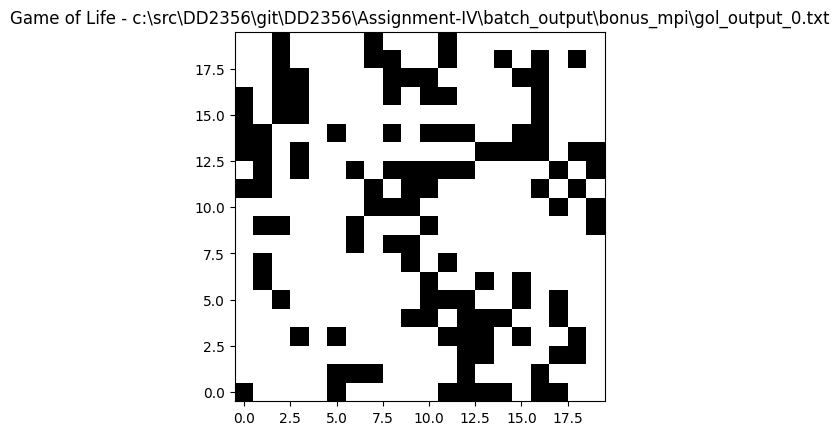

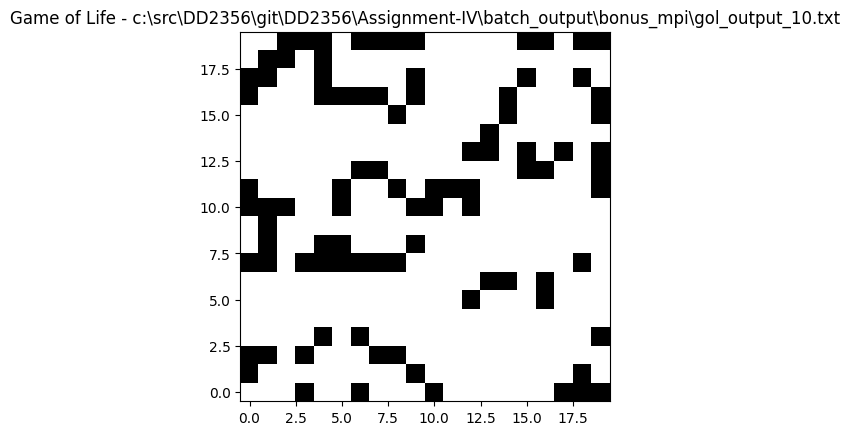

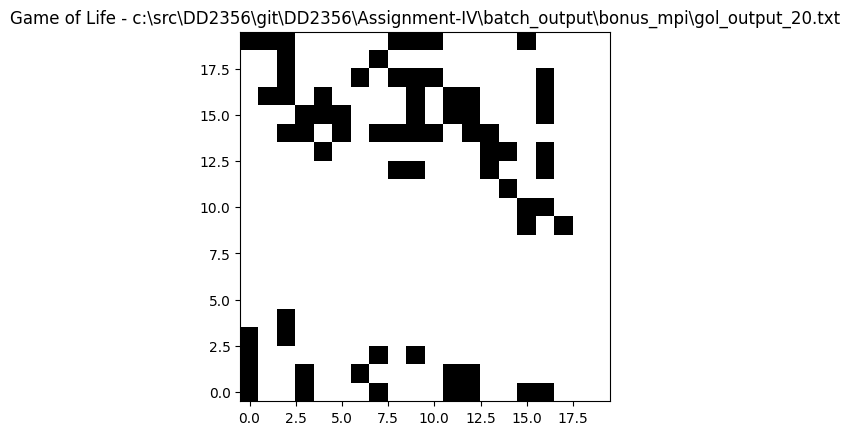

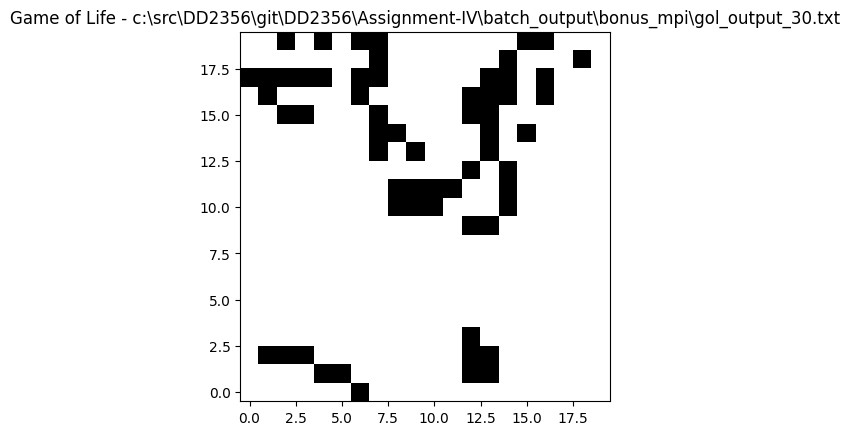

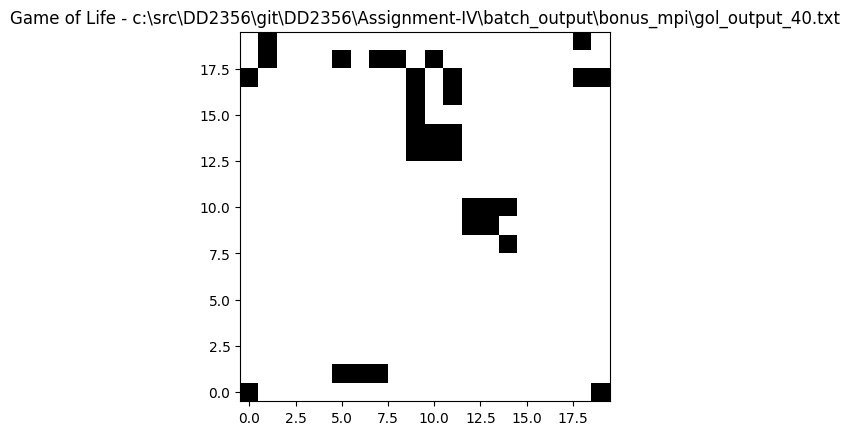

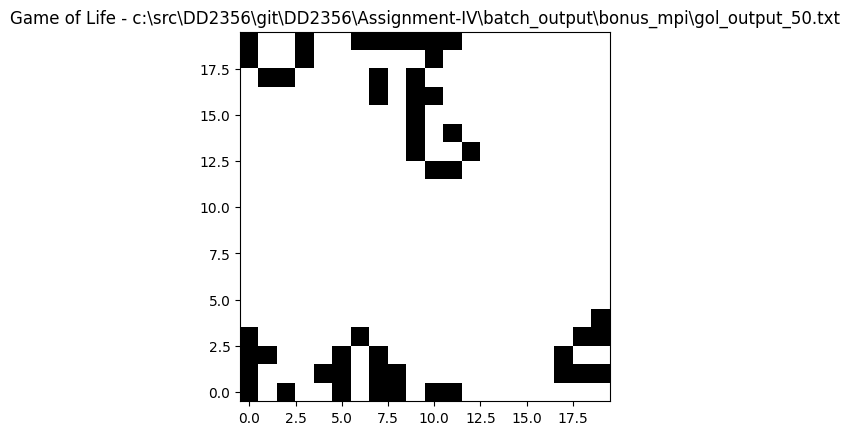

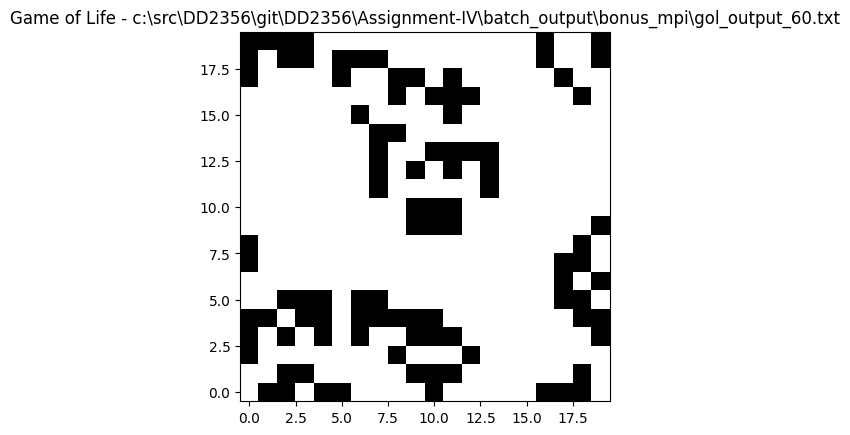

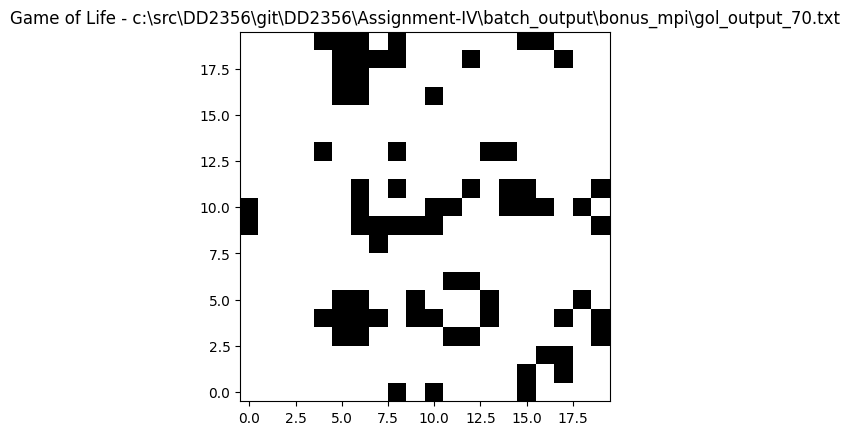

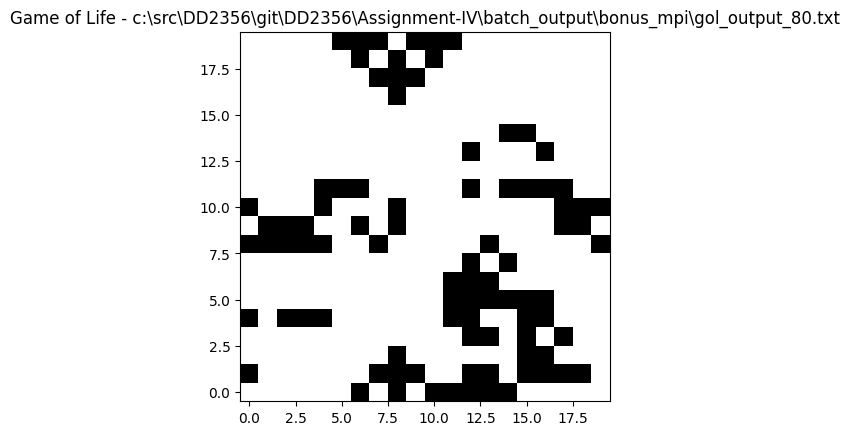

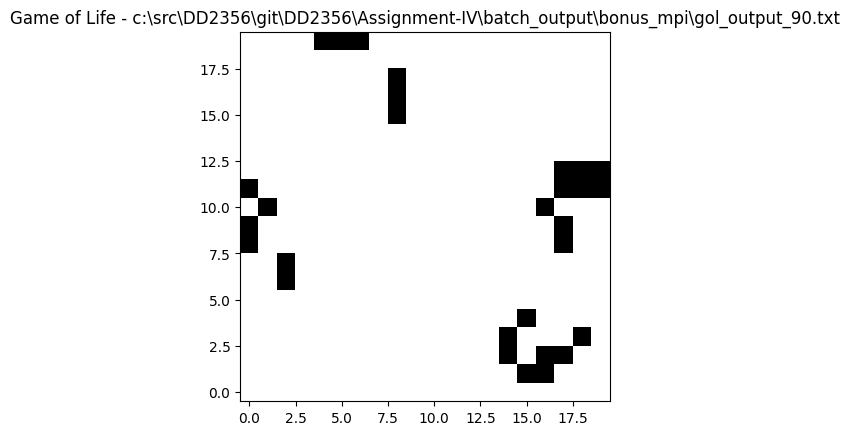

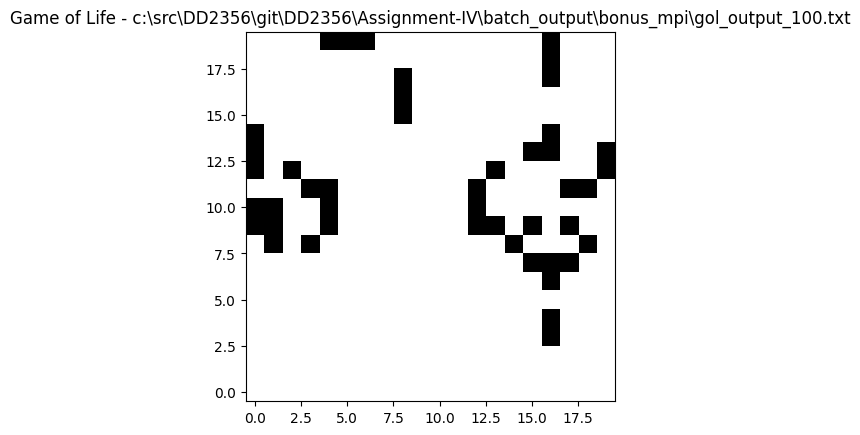

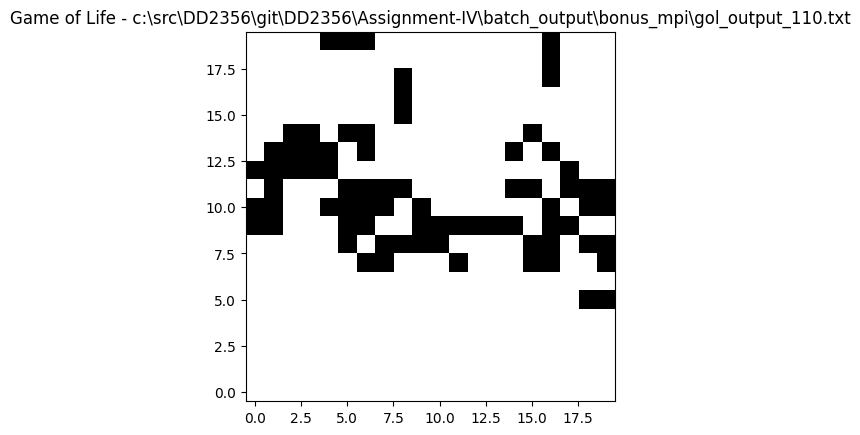

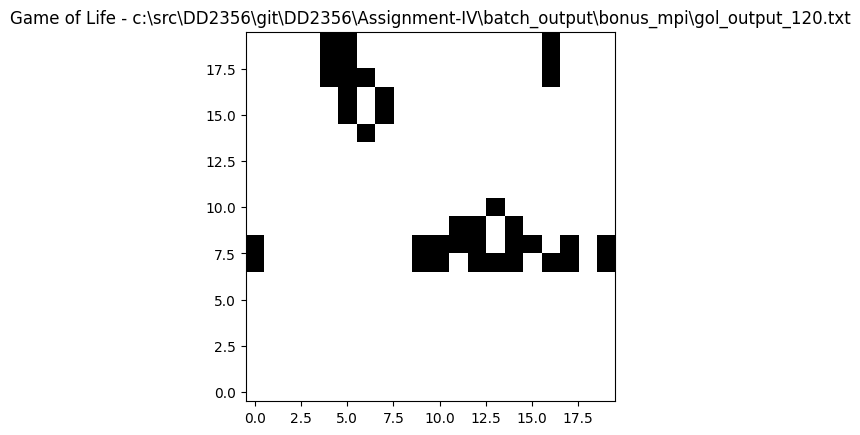

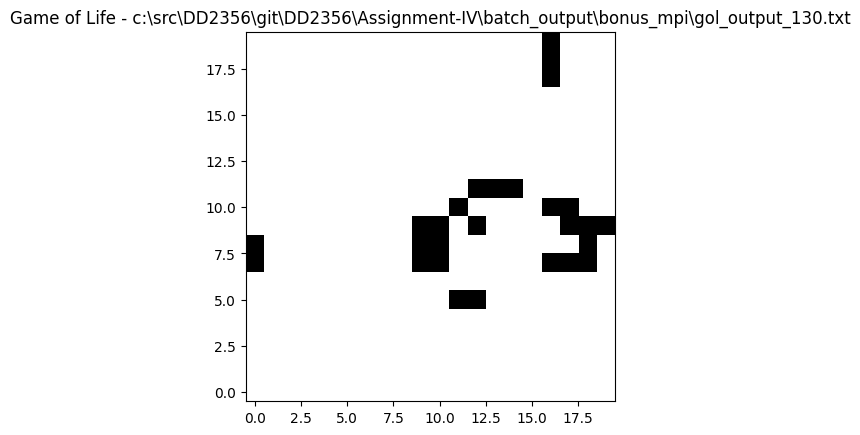

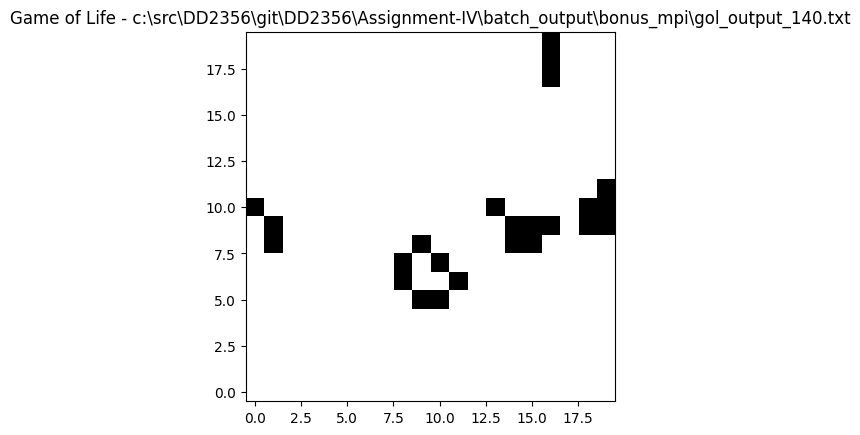

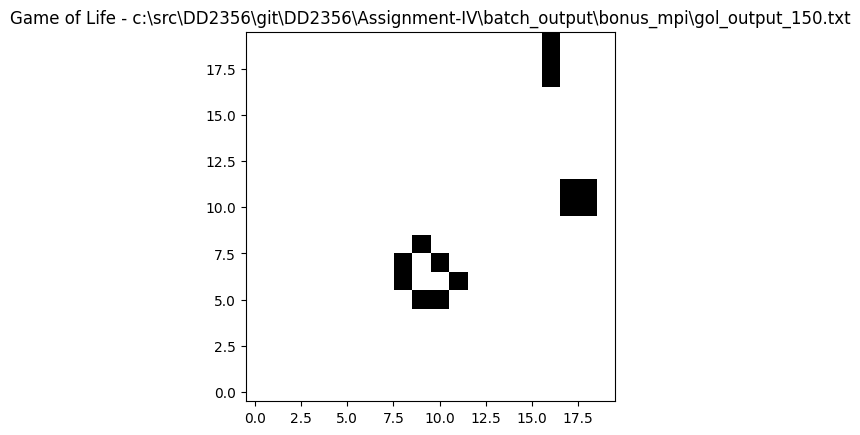

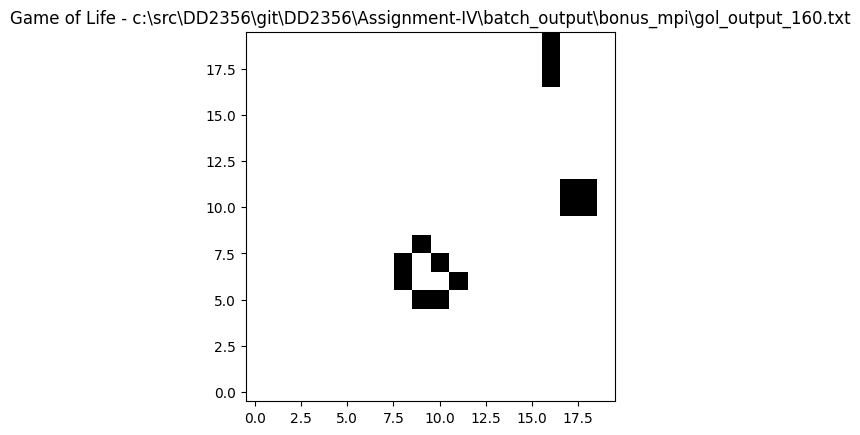

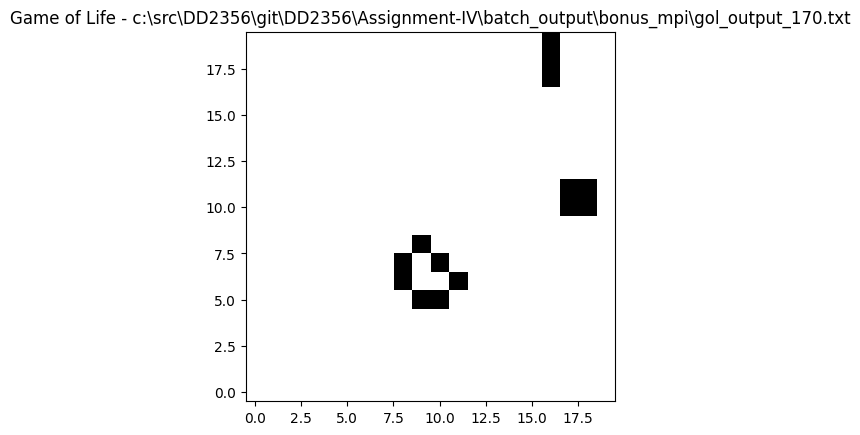

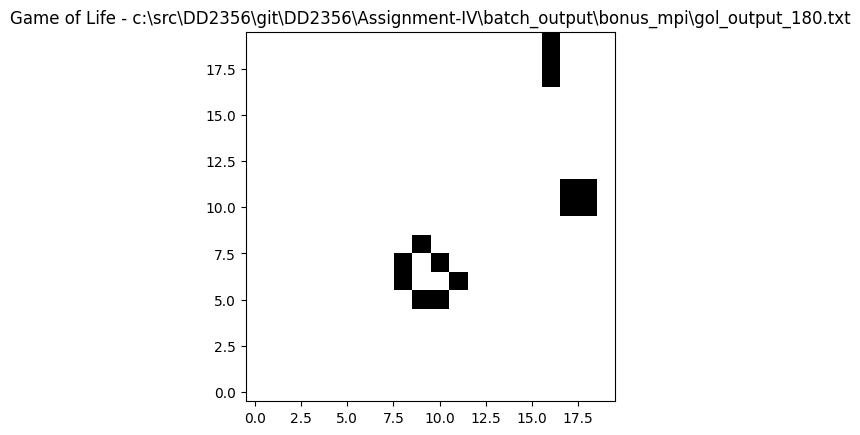

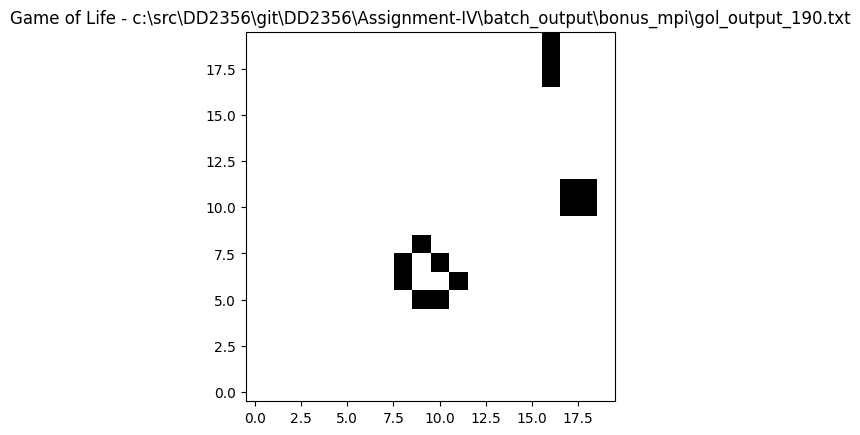

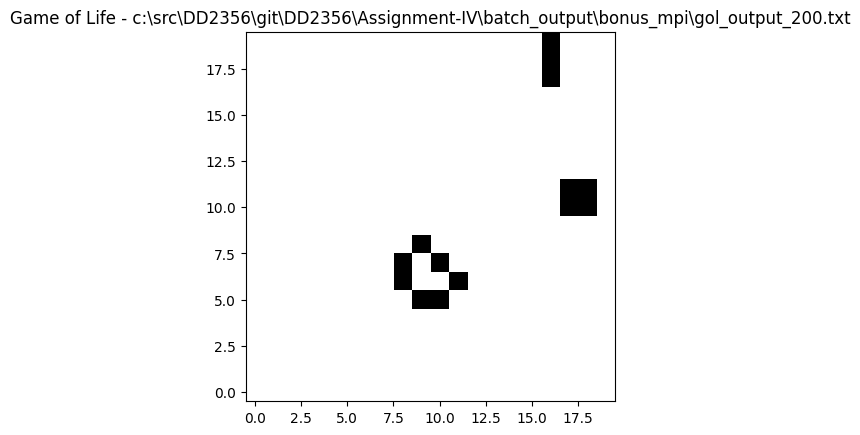

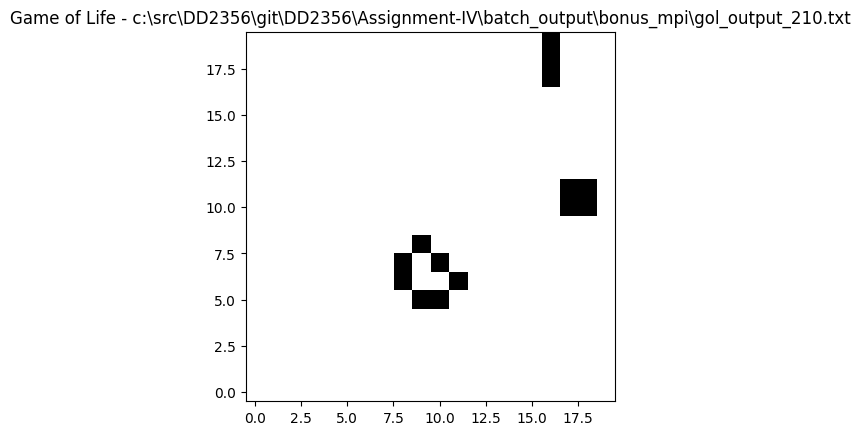

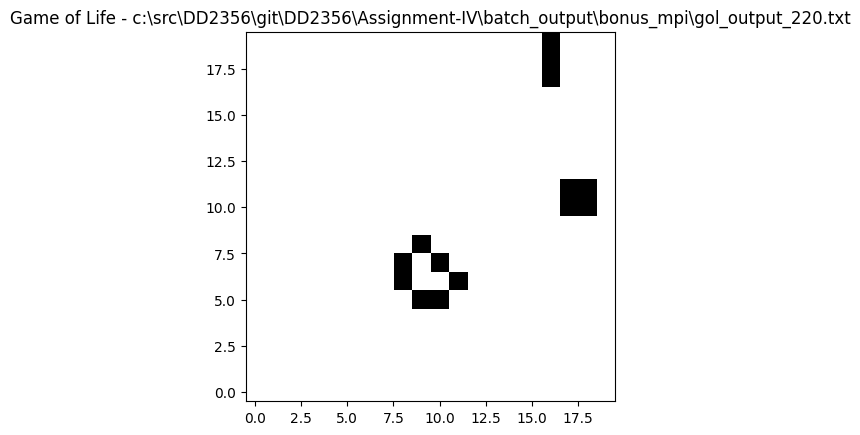

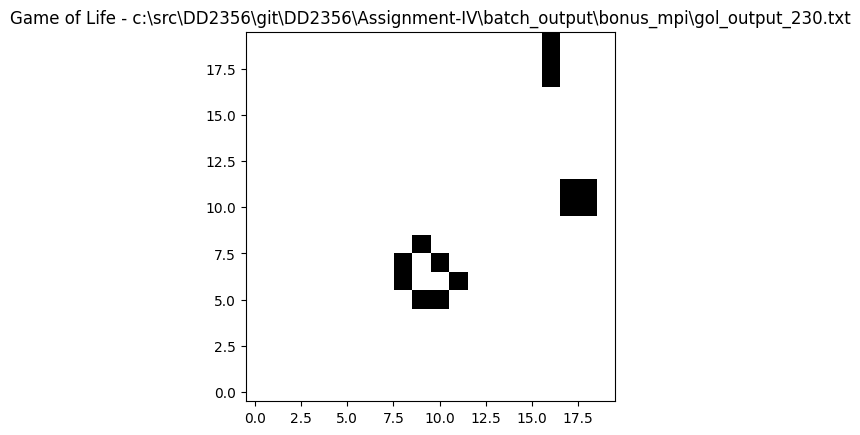

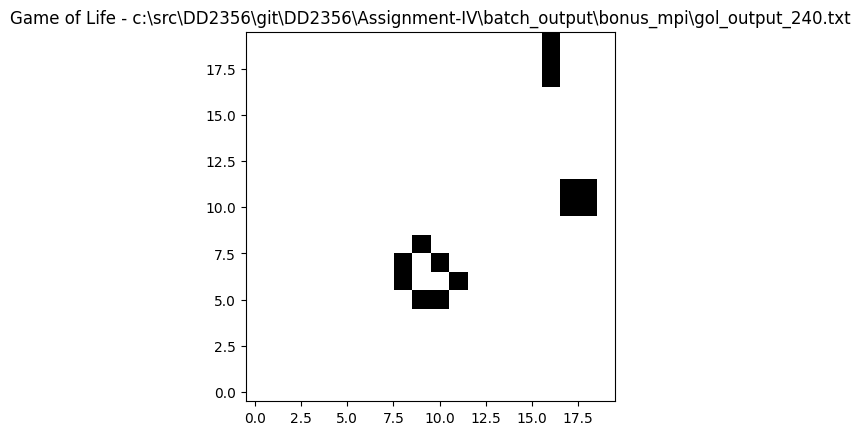

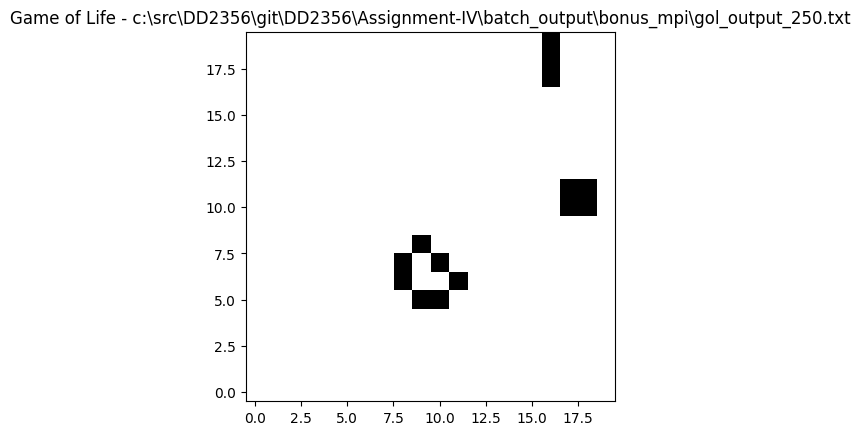

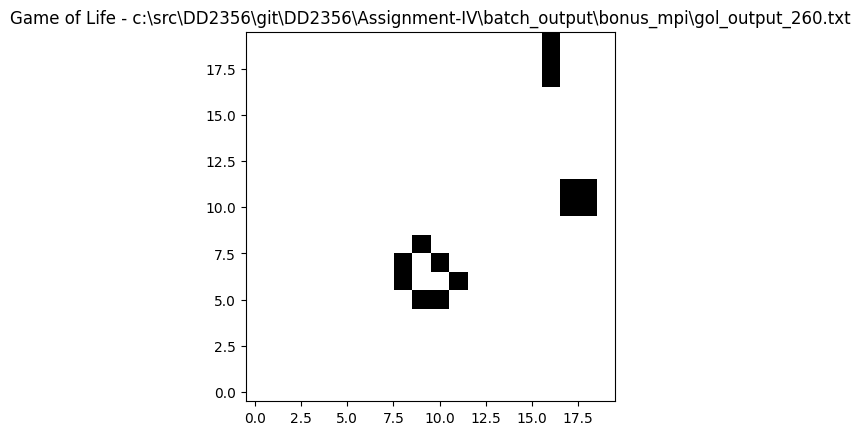

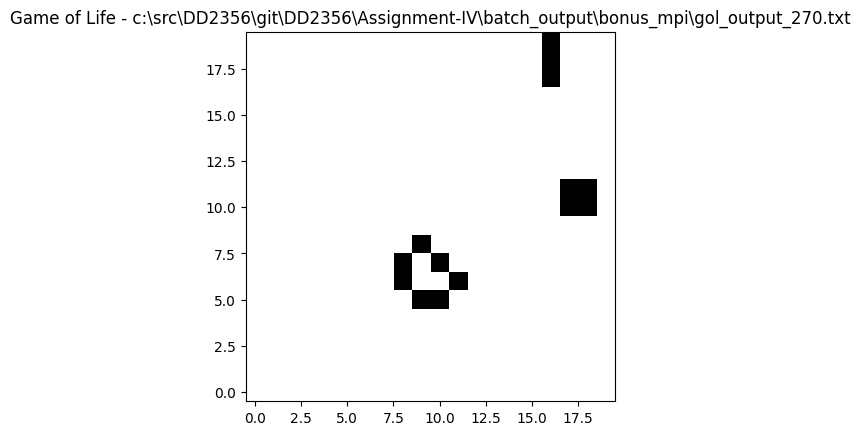

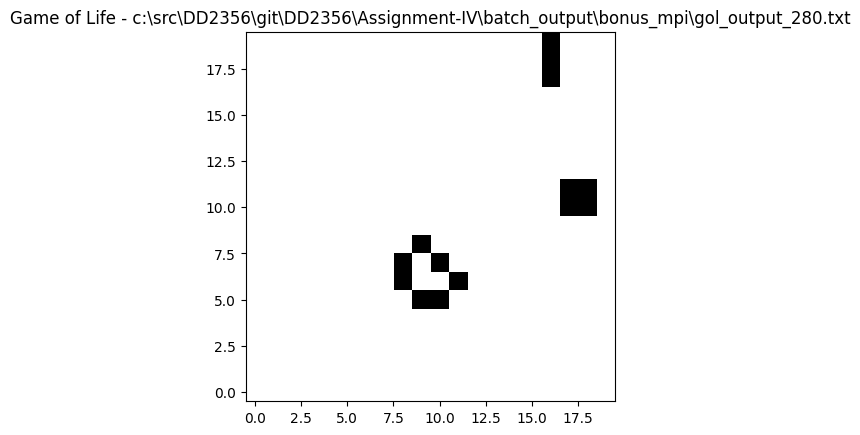

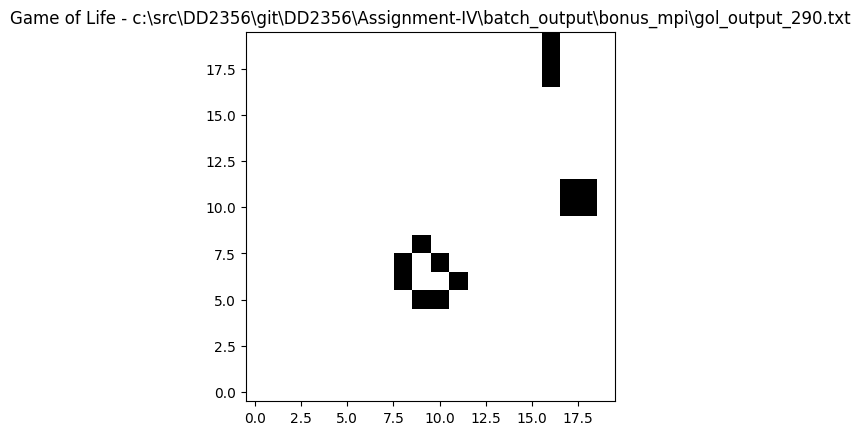

GIF saved at: c:\src\DD2356\git\DD2356\Assignment-IV\batch_output\bonus_mpi\game_of_life_mpi.gif


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import imageio.v2 as imageio  # imageio.v2 to avoid FutureWarnings

# Set up directories and file matching
current_working_directory = os.getcwd()
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'bonus_mpi'))
pattern = os.path.join(base_directory, "gol_output_*.txt")
files = glob.glob(pattern)

# Sort files numerically by step number
files_sorted = sorted(
    files,
    key=lambda path: int(os.path.splitext(os.path.basename(path))[0].split('_')[-1])
)

# Create temporary list of images
images = []
for file in files_sorted:
    data = np.loadtxt(file)
    fig, ax = plt.subplots()
    ax.imshow(data, cmap='binary', origin='lower')
    ax.set_title(f"Step {os.path.basename(file)}")
    ax.axis('off')

    # Save to a temporary image buffer
    temp_path = f"{file}.png"
    plt.savefig(temp_path, bbox_inches='tight')
    plt.close(fig)
    images.append(imageio.imread(temp_path))
    os.remove(temp_path)  # clean up temporary image

# Save the gif
gif_path = os.path.join(base_directory, "game_of_life_mpi.gif")
imageio.mimsave(gif_path, images, duration=5.0)

for file in files_sorted:
    data = np.loadtxt(file)
    plt.imshow(data, cmap='binary', origin='lower')
    plt.title(f"Game of Life - {file}")
    plt.pause(0.5)

plt.show()

print(f"GIF saved at: {gif_path}")


# Ex4 CBlas

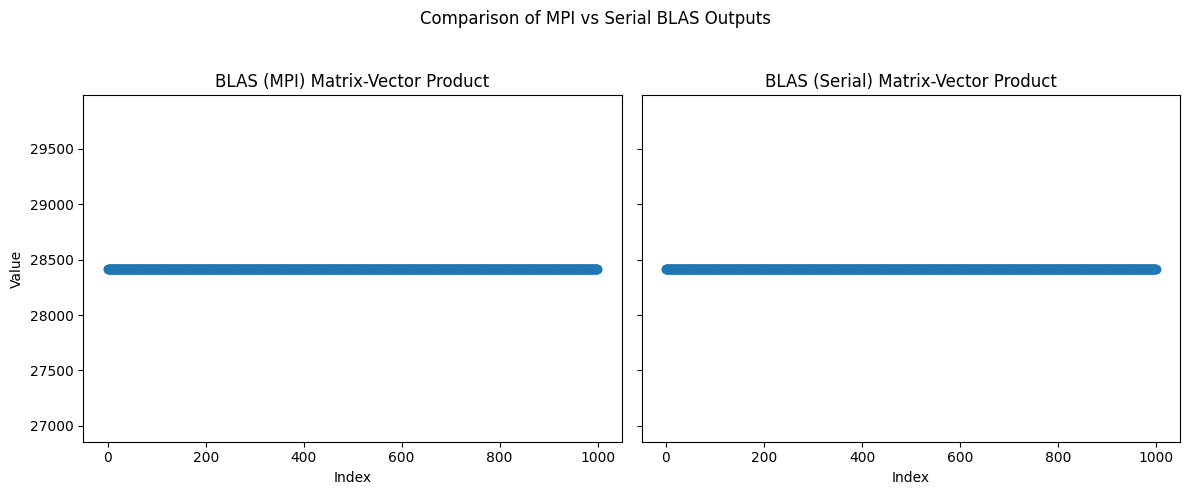

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# locate the directory
cwd = os.getcwd()
base_directory = os.path.normpath(os.path.join(cwd, 'batch_output', 'ex4'))

# file paths
file_mpi    = os.path.join(base_directory, "blas_output.txt")
file_serial = os.path.join(base_directory, "blas_serial_output.txt")

# load data
data_mpi    = np.loadtxt(file_mpi)
data_serial = np.loadtxt(file_serial)

# create two subplots, side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# MPI version
ax1.plot(data_mpi, marker='o', linestyle='-')
ax1.set_title("BLAS (MPI) Matrix-Vector Product")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")

# Serial version
ax2.plot(data_serial, marker='o', linestyle='-')
ax2.set_title("BLAS (Serial) Matrix-Vector Product")
ax2.set_xlabel("Index")
# sharey=True means ax2 will share the same y-axis

plt.suptitle("Comparison of MPI vs Serial BLAS Outputs")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


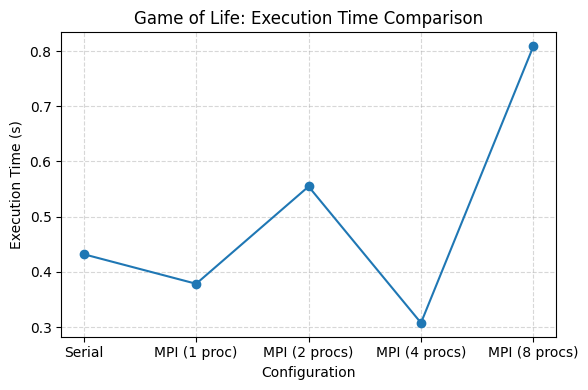

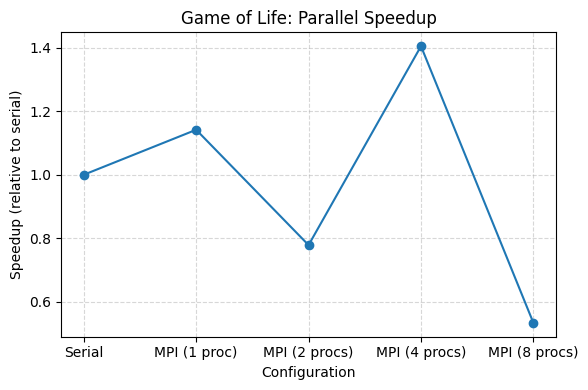

In [18]:
import re
import os
import matplotlib.pyplot as plt

# --- BASE DIRECTORY WHERE YOUR .stat FILES LIVE ---
cwd = os.getcwd()
base_dir = os.path.normpath(os.path.join(cwd, 'batch_output', 'bonus'))

# --- MAP CONFIG NAMES TO FILE PATHS ---
configs = {
    'Serial':        os.path.join(base_dir, 'serial_game-stat.stat'),
    'MPI (1 proc)':  os.path.join(base_dir, 'mpi_game-1-stat.stat'),
    'MPI (2 procs)': os.path.join(base_dir, 'mpi_game-2-stat.stat'),
    'MPI (4 procs)': os.path.join(base_dir, 'mpi_game-4-stat.stat'),
    'MPI (8 procs)': os.path.join(base_dir, 'mpi_game-8-stat.stat'),
}

# --- FUNCTION TO EXTRACT TIME ---
def parse_time(path):
    with open(path, 'r') as f:
        for line in f:
            m = re.search(r'([\d\.]+)\s+seconds time elapsed', line)
            if m:
                return float(m.group(1))
    raise ValueError(f"No timing line found in {path}")

# --- LOAD TIMES ---
times = {}
for label, path in configs.items():
    if not os.path.isfile(path):
        raise FileNotFoundError(f"Timing file not found: {path}")
    times[label] = parse_time(path)

# --- ORDER FOR PLOTTING ---
order = ['Serial', 'MPI (1 proc)', 'MPI (2 procs)', 'MPI (4 procs)', 'MPI (8 procs)']
labels = order
exec_times = [times[l] for l in labels]

# --- PLOT EXECUTION TIMES ---
plt.figure(figsize=(6,4))
plt.plot(labels, exec_times, marker='o', linestyle='-')
plt.xlabel('Configuration')
plt.ylabel('Execution Time (s)')
plt.title('Game of Life: Execution Time Comparison')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('execution_time_comparison.png')
plt.show()

# --- COMPUTE & PLOT SPEEDUP ---
serial_time = times['Serial']
speedups = [serial_time / times[l] for l in labels]

plt.figure(figsize=(6,4))
plt.plot(labels, speedups, marker='o', linestyle='-')
plt.xlabel('Configuration')
plt.ylabel('Speedup (relative to serial)')
plt.title('Game of Life: Parallel Speedup')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('speedup_comparison.png')
plt.show()


# Ex2 Strong Scaling / Weak scaling

Scanning c:\src\DD2356\git\DD2356\Assignment-IV\batch_output\ex2, found 233 candidate files:
   ex2_ex2_p_N1.stderr
   ex2_ex2_p_N2.stderr
   ex2_ex2_p_N4.stderr
   ex2_parallel_strong_sum_2_1_1000.data
   ex2_parallel_strong_sum_2_1_10000.data
   ex2_parallel_strong_sum_2_1_100000.data
   ex2_parallel_strong_sum_2_1_1000000.data
   ex2_parallel_strong_sum_2_2_1000.data
   ex2_parallel_strong_sum_2_2_10000.data
   ex2_parallel_strong_sum_2_2_100000.data
   ex2_parallel_strong_sum_2_2_1000000.data
   ex2_parallel_strong_sum_2_4_1000.data
   ex2_parallel_strong_sum_2_4_10000.data
   ex2_parallel_strong_sum_2_4_100000.data
   ex2_parallel_strong_sum_2_4_1000000.data
   ex2_parallel_strong_sum_2_8_1000.data
   ex2_parallel_strong_sum_2_8_10000.data
   ex2_parallel_strong_sum_2_8_100000.data
   ex2_parallel_strong_sum_2_8_1000000.data
   ex2_parallel_strong_sum_4_1_1000.data
   ex2_parallel_strong_sum_4_1_10000.data
   ex2_parallel_strong_sum_4_1_100000.data
   ex2_parallel_strong_sum_4_1_1

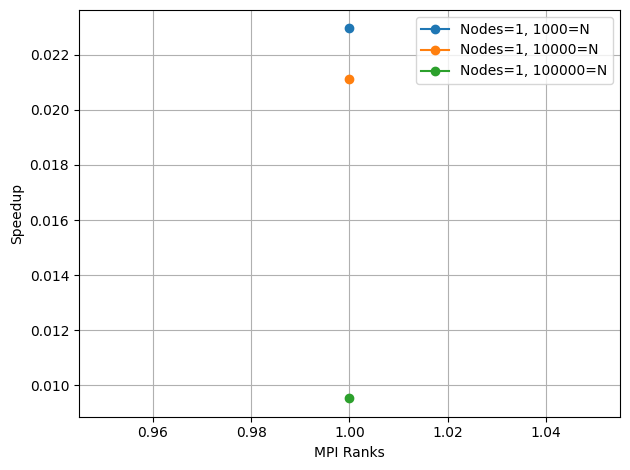

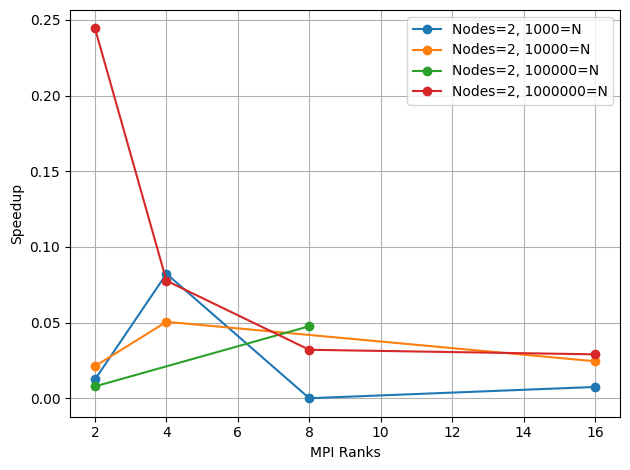

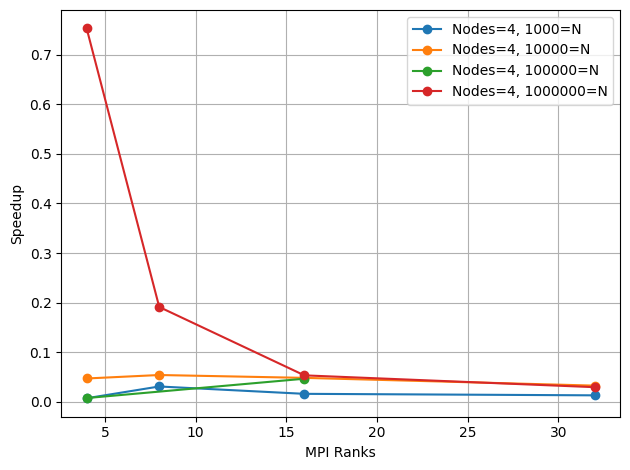

In [76]:
#!/usr/bin/env python3
import os
import re
import glob
import sys
import numpy as np
import matplotlib.pyplot as plt

def find_data_files(base_dir):
    pattern = os.path.join(base_dir, "ex2_*")
    files = glob.glob(pattern)
    print(f"Scanning {base_dir}, found {len(files)} candidate files:")
    for f in sorted(files):
        print("  ", os.path.basename(f))
    return files


def parse_serial_times(files):
    serial = {}
    for path in files:
        name = os.path.basename(path).lower()
        if "serial" not in name:
            continue
        if os.path.getsize(path) == 0:
            print(f"  [skip empty] {name}")
            continue

        text = open(path).read()
        m = re.search(r"([0-9]+\.?[0-9]*)\s+seconds\s+time\s+elapsed", text)
        if not m:
            print(f"  [skip no-timestamp] {name}")
            continue

        # infer N as the last integer in the filename
        nums = list(map(int, re.findall(r"(\d+)", name)))
        if not nums:
            print(f"  [skip no-size] {name}")
            continue
        N = nums[-1]

        t = float(m.group(1))
        serial[N] = t
        print(f"  [serial] N={N} → {t:.6f}s")
    return serial


def parse_parallel_strong_times(files):
    parallel = {}
    for path in files:
        name = os.path.basename(path).lower()
        if "parallel_strong_sum" not in name:
            continue
        if os.path.getsize(path) == 0:
            print(f"  [skip empty] {name}")
            continue

        mfn = re.match(r".*?_n(\d+)_(\d+)_(\d+)", name)
        if not mfn:
            print(f"  [skip bad-name] {name}")
            continue
        nodes = int(mfn.group(1))
        ppn   = int(mfn.group(2))
        N     = int(mfn.group(3))
        ranks = nodes * ppn

        text = open(path).read()
        m = re.search(r"([0-9]+\.?[0-9]*)\s+seconds\s+time\s+elapsed", text)
        if not m:
            print(f"  [skip no-timestamp] {name}")
            continue
        t = float(m.group(1))

        # now nest by nodes → N → ranks
        parallel.setdefault(nodes, {}) \
                .setdefault(N, {})[ranks] = t
        print(f"  [MPI] nodes={nodes}, N={N}, ranks={ranks} → {t:.6f}s")
    return parallel


def parse_parallel_weak_times(files):
    parallel = {}
    for path in files:
        name = os.path.basename(path).lower()
        if "parallel_weak_sum" not in name:
            continue
        if os.path.getsize(path) == 0:
            print(f"  [skip empty] {name}")
            continue

        mfn = re.match(r".*?_n(\d+)_(\d+)_(\d+)", name)
        if not mfn:
            print(f"  [skip bad-name] {name}")
            continue
        nodes = int(mfn.group(1))
        ppn   = int(mfn.group(2))
        N     = int(mfn.group(3))
        ranks = nodes * ppn

        text = open(path).read()
        m = re.search(r"([0-9]+\.?[0-9]*)\s+seconds\s+time\s+elapsed", text)
        if not m:
            print(f"  [skip no-timestamp] {name}")
            continue
        t = float(m.group(1))

        # now nest by nodes → N → ranks
        parallel.setdefault(nodes, {}) \
                .setdefault(N, {})[ranks] = t
        print(f"  [MPI] nodes={nodes}, N={N}, ranks={ranks} → {t:.6f}s")
    return parallel


def calculate_speedup(serial, parallel):
    speedup = {}
    for nodes, sizes in parallel.items():
        for N, times in sizes.items():
            # skip if no matching serial time
            if N not in serial:
                continue
            Ts = serial[N]
            for ranks, Tp in times.items():
                s = Ts / Tp
                speedup.setdefault(nodes, {}) \
                        .setdefault(N, {})[ranks] = s
    return speedup


def plot_speedup(speedup):
    for N in sorted(speedup):
        plt.figure()
        for nodes in sorted(speedup[N]):
            ranks = sorted(speedup[N][nodes])
            su_vals = [speedup[N][nodes][r] for r in ranks]
            plt.plot(ranks, su_vals,"o-",label=f"Nodes={N}, {nodes}=N")
        # plt.title(f"Speedup vs. Ranks for N = {N}")
        plt.xlabel("MPI Ranks")
        plt.ylabel("Speedup")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


def main():
    base_dir = os.path.join(os.getcwd(), "batch_output", "ex2")
    files    = find_data_files(base_dir)

    serial   = parse_serial_times(files)
    parallel_strong = parse_parallel_strong_times(files)
    parallel_weak = parse_parallel_weak_times(files)

    # Compute performance metrics
    speedup_strong      = calculate_speedup(serial, parallel_strong)
    speedup_weak      = calculate_speedup(serial, parallel_weak)
    plot_speedup(speedup_strong)
    #plot_speedup(speedup_weak)

if __name__ == "__main__":
    main()
